## Installing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

C:\Users\shiva\AppData\Local\Temp\ipykernel_34260\724320883.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


## Spliting Data as Train and Test

In [2]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df = pd.concat([df_train,df_test])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## Data Preprocessing

In [4]:
df.info() # to check for data summary 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   object 
 5   Volume  1278 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.9+ KB


In [5]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.shape

(1278, 6)

In [8]:
df.isnull().sum() #to check for null values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

<AxesSubplot:>

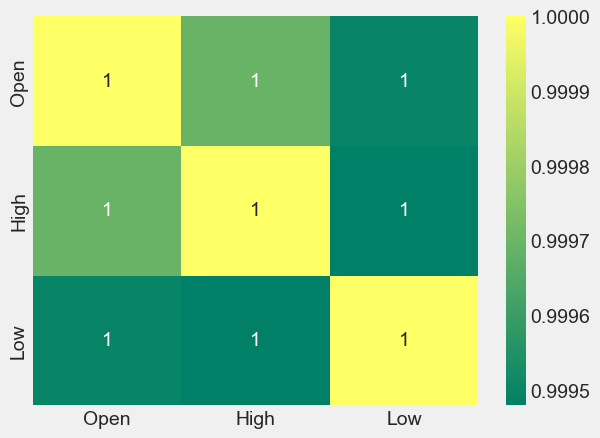

In [10]:
sns.heatmap(df_train.corr(), annot=True, cmap='summer') # to check for high corelation

In [11]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50] 
test = df[len(train):] 
# reshape
train = train.reshape(train.shape[0],1)


In [12]:
train.shape

(1228, 1)

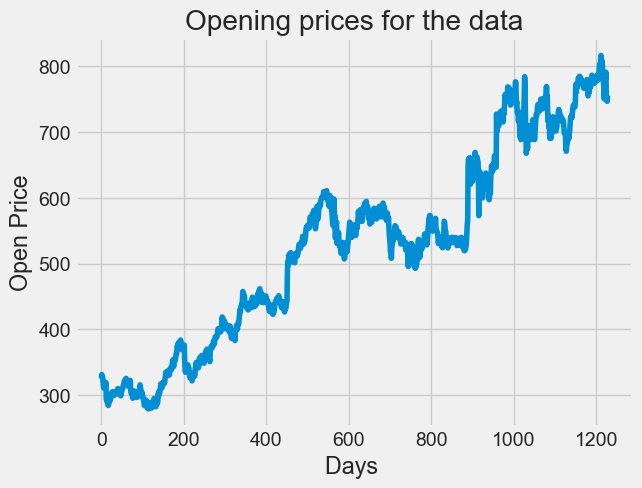

In [13]:
plt.plot(train);
plt.title("Opening prices for the data");
plt.xlabel("Days ")
plt.ylabel("Open Price")
plt.show()

## Normalization / Feature Scaling

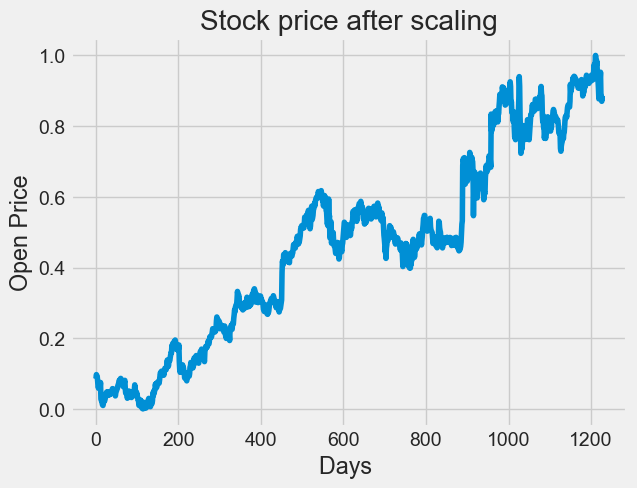

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train
plt.plot(train_scaled)
plt.xlabel("Days ")
plt.ylabel("Open Price")
plt.title("Stock price after scaling")
plt.show()

## Creating X_train and y_train from scaled Train data

In [15]:
# We add first 50 timesteps to "X_train" and  51 timesteps to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

## Creating RNN model 

In [16]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
Rnn_history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 4s 26ms/step - loss: 0.4273
Epoch 2/100
37/37 [==============================] - 1s 26ms/step - loss: 0.2789
Epoch 3/100
37/37 [==============================] - 1s 25ms/step - loss: 0.2170
Epoch 4/100
37/37 [==============================] - 1s 26ms/step - loss: 0.1632
Epoch 5/100
37/37 [==============================] - 1s 25ms/step - loss: 0.1137
Epoch 6/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0990
Epoch 7/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0786
Epoch 8/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0677
Epoch 9/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0524
Epoch 10/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0480
Epoch 11/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0449
Epoch 12/100
37/37 [==============================] - 1s 25ms/step - loss: 0.0366
Epoch 13/100
37/37 [=====

## Evaluating Model

In [17]:
# Losses
Rnn_history.history["loss"]

[0.4273025691509247,
 0.27891501784324646,
 0.2170015126466751,
 0.16322092711925507,
 0.11374820023775101,
 0.09897536039352417,
 0.07858031243085861,
 0.06769365072250366,
 0.05237314850091934,
 0.0479729138314724,
 0.04485436901450157,
 0.03657417744398117,
 0.03441290184855461,
 0.029696904122829437,
 0.026613887399435043,
 0.02220841869711876,
 0.022498836740851402,
 0.01960058882832527,
 0.01898283138871193,
 0.017224160954356194,
 0.015590020455420017,
 0.01438855193555355,
 0.013815322890877724,
 0.01357550360262394,
 0.013013635762035847,
 0.012238158844411373,
 0.012003167532384396,
 0.01058980356901884,
 0.011391779407858849,
 0.010088573209941387,
 0.010473942384123802,
 0.009033137932419777,
 0.008707026019692421,
 0.008399446494877338,
 0.007882430218160152,
 0.007624382618814707,
 0.006669886410236359,
 0.006494111381471157,
 0.006604712922126055,
 0.0063552469946444035,
 0.0063505047000944614,
 0.0057188980281353,
 0.005466139875352383,
 0.005761052947491407,
 0.0050958

In [18]:
min_loss = np.min(Rnn_history.history["loss"])
RMSE = math.sqrt(min_loss)
RMSE

0.04471176706498009

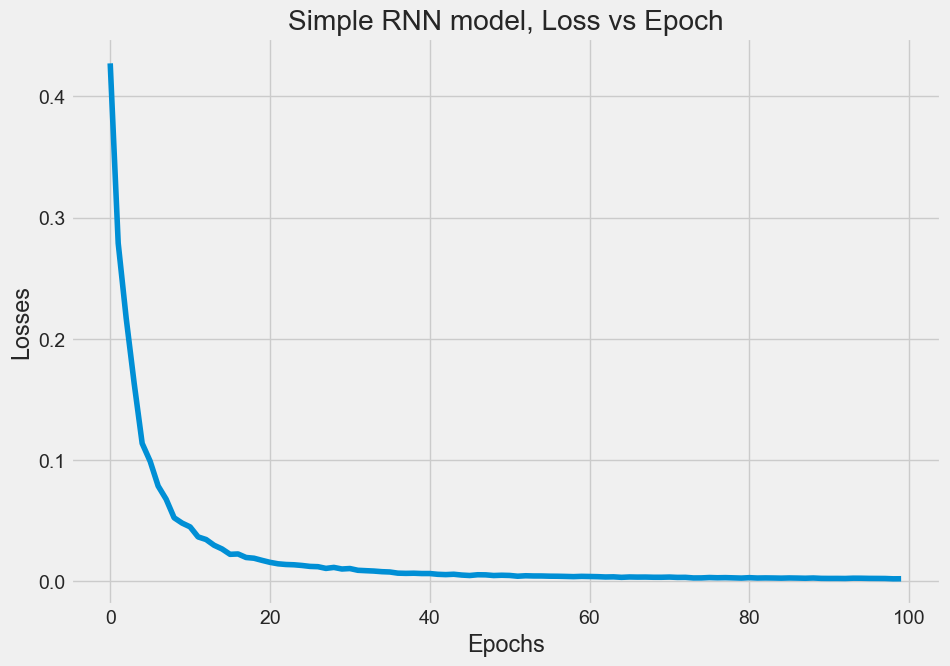

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(Rnn_history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [20]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [21]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # We get 50 elements by shifting from 0 to 50 and from 1 to 51. 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Model predictions for train data 

In [22]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 10ms/step


In [23]:
rmse = np.sqrt(np.mean(((predicted_data - test) ** 2)))
rmse

10.575693806134018

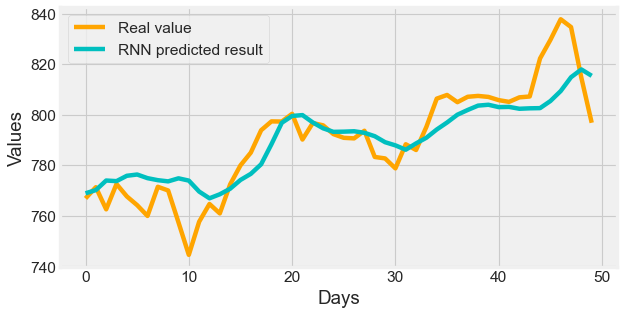

In [24]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Creating LSTM Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
history=model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
1178/1178 [==============================] - 10s 7ms/step - loss: 0.0100
Epoch 2/50
1178/1178 [==============================] - 9s 8ms/step - loss: 0.0010
Epoch 3/50
1178/1178 [==============================] - 9s 7ms/step - loss: 8.0498e-04
Epoch 4/50
1178/1178 [==============================] - 9s 7ms/step - loss: 7.2886e-04
Epoch 5/50
1178/1178 [==============================] - 8s 7ms/step - loss: 6.0736e-04
Epoch 6/50
1178/1178 [==============================] - 8s 7ms/step - loss: 5.3590e-04
Epoch 7/50
1178/1178 [==============================] - 9s 8ms/step - loss: 4.8364e-04
Epoch 8/50
1178/1178 [==============================] - 9s 8ms/step - loss: 4.3097e-04
Epoch 9/50
1178/1178 [==============================] - 8s 7ms/step - loss: 4.1820e-04
Epoch 10/50
1178/1178 [==============================] - 7s 6ms/step - loss: 3.9571e-04
Epoch 11/50
1178/1178 [==============================] - 7s 6ms/step - loss: 3.8613e-04
Epoch 12/50
1178/1178 [=========================

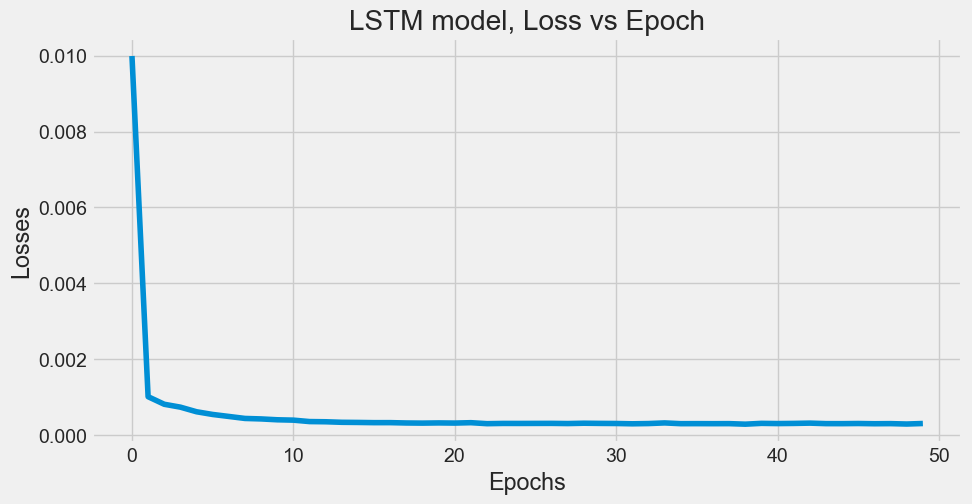

In [27]:
plt.figure(figsize =(10,5))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Loss vs Epoch")
plt.show()

## Model predictions

In [28]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 0s 4ms/step


In [29]:
min_loss = np.min(history.history['loss'])
RMSE = math.sqrt(min_loss)
RMSE

0.016727353120752835

In [30]:
rmse = np.sqrt(np.mean(((predicted_data2 - test) ** 2)))
rmse

8.278525357186913

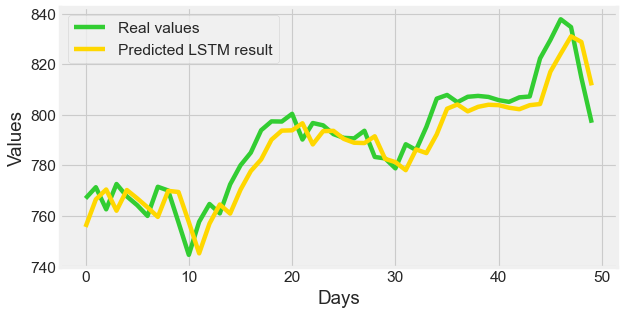

In [31]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Comparetive Study of RNN predictions and LSTM predictions

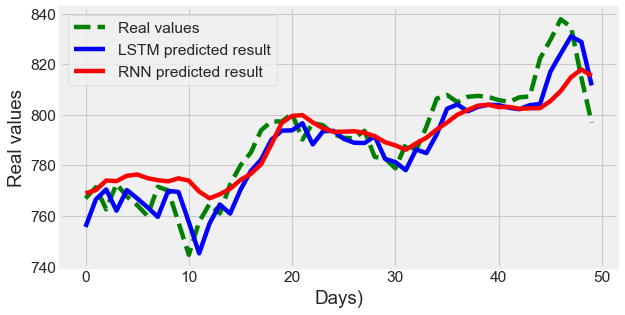

In [32]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") #
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()